In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import IPython.display as display
import os

from classes import *
from gen_utils import *
from tqdm import tqdm
from utils import *

# fix the seed for reproducibility
random.seed(666)
np.random.seed(666)


# minihack env creation with a .des file

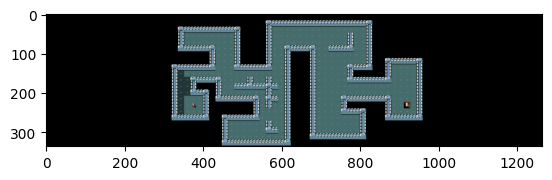

In [3]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "maps/complex_maze.des",
    max_episode_steps=10000,
)
state = env.reset()
#env.render()
plt.imshow(state['pixel'])

In [4]:
state = env.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

map = Map(game_map, start, target)

In [5]:
print(f"> start: {map.start}, target: {map.target}")

> start: (14, 23), target: (14, 57)


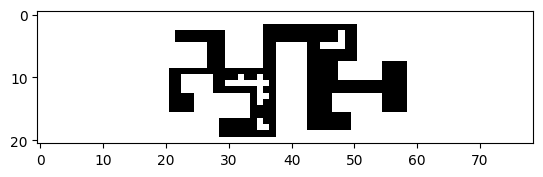

In [6]:
# print the map_matrix with matplotlib where the walls are black and the floor is white
plt.imshow(map.map_matrix, cmap='gray')
plt.show()


In [7]:
from pyswip import Prolog


In [8]:
PATH = 'kb/kb.pl'
KB = Prolog()
KB.consult(PATH)

In [9]:
KB.retractall("maze(_)")
KB.retractall("start(_,_)")
KB.asserta(f'maze({map.map_matrix})')
KB.asserta(f'start({map.start[0]}, {map.start[1]})')

In [10]:
for i in KB.query("maze(X)"):
    print(f'{i["X"]}\n')

#list(KB.query("maze(X)"))


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# NTH1

In Prolog, `nth1/3` is a built-in predicate that is used to access elements in a list by index. The `nth1/3` predicate has the following form:

```prolog
nth1(Index, List, Element)
```
Index: The index of the element you want to access.

List: The list from which you want to access the element.

Element: The variable that will be unified with the element at the specified index.


In [11]:
result = list(KB.query("maze(M), nth1(14, M, Row), nth1(23, Row, Cell)"))
if result:
    cell_value = result[0]["Cell"]
    print(f"Cell value: {cell_value}")
else:
    print("Query result is empty.")

Cell value: 0


In [12]:
list(KB.query("start(ROW,COL)"))

[{'ROW': 14, 'COL': 23}]

In [13]:
list(KB.query(f"is_valid(10,23)"))

[{}]

In [14]:
list(KB.query(f"is_valid(9,23)"))

[]

In [15]:
solution = list(KB.query(f"is_valid(14,23)"))
if solution:
    print("Position is valid.")
else:
    print("Position is not valid.")

Position is valid.


In [16]:
list(KB.query(f"is_valid_action(11,23,0)"))

[{}]

In [17]:
list(KB.query(f"is_valid_action(10,23,0)"))

[]

In [18]:
#individual = Individual(random_nactions(), 1, map)

In [19]:
#individual.path[0] == map.start

# We have to decide if we want to generate a random path or random actions

random path $\Rightarrow$ a path of exactly n steps

random actions $\Rightarrow$ many action will be not valid $\Rightarrow$ the path will be shorter OR, as is implemented now, with many repetition of the same position.

# NOTE:
minihack wont crash if we input a not valid action starting from a valid action. It will simply not execute the action (as if we are playing), hence we are updating the path position with the same position.

In [20]:
Individual(random_nactions(300), 1, map)

AttributeError: 'numpy.ndarray' object has no attribute 'start'

In [ ]:
individual = Individual(random_nactions(300), 1, map)
individual1 = Individual(random_nactions(300), 1, map)
len(crossover_uniform(individual.actions, individual1.actions))

300

In [ ]:
# no need to call raw count_loops function anymore
individual.path.loops, individual1.path.loops

(274, 271)

In [ ]:
(individual.path)

In [ ]:
individual.last_position

(14, 23)

In [ ]:
# create first generation
MAX_GENERATIONS = 500
MAX_INDIVIDUALS = 100
best_individuals = []

print("> Creating initial population...")
individuals = [Individual(random_nactions(300), 1, map) for _ in range(MAX_INDIVIDUALS)]
individuals.sort(key=lambda x: x.fitness, reverse=True)
#print(f'best_individual: {individuals[0].fitness}')
print("> Evolving...")

for generation in tqdm(range(MAX_GENERATIONS)):

    best_fitness = individuals[0].fitness
    best_individuals.append(individuals[0]) 
    if generation % 25 == 0:
        print(
            f'best_individual in generation {generation}: fitness: {best_fitness}, wrong actions: {individuals[0].wrong_actions}, loops: {individuals[0].path.loops}, distance: {individuals[0].distance}')

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.
    child1, child2 = individuals[0].actions, individuals[1].actions
    offspring = [crossover_uniform(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child, valid_actions_bitmap(map.start, path_from_actions(map.map, map.start, child))) for child in offspring]

    individuals[2:] = [Individual(offspring[i], generation+1, map) for i in range(MAX_INDIVIDUALS-2)]
    individuals.sort(key=lambda x: x.fitness, reverse=True)

best_fitness = individuals[0].fitness
best_individuals.append(individuals[0])
print(f'best_individual in generation {generation}: {best_fitness}, wrong actions: {individuals[0].wrong_actions}')



> Creating initial population...
> Evolving...


  0%|          | 0/500 [00:00<?, ?it/s]

best_individual in generation 0: fitness: -751, wrong actions: 85, loops: 230, distance: 27


  5%|▌         | 25/500 [00:21<06:22,  1.24it/s]

best_individual in generation 25: fitness: -437, wrong actions: 23, loops: 177, distance: 0


 10%|█         | 50/500 [00:42<06:31,  1.15it/s]

best_individual in generation 50: fitness: -437, wrong actions: 23, loops: 177, distance: 0


 15%|█▌        | 75/500 [01:04<06:20,  1.12it/s]

best_individual in generation 75: fitness: -437, wrong actions: 23, loops: 177, distance: 0


 20%|██        | 100/500 [01:25<05:28,  1.22it/s]

best_individual in generation 100: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 25%|██▌       | 125/500 [01:46<05:10,  1.21it/s]

best_individual in generation 125: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 30%|███       | 150/500 [02:07<04:46,  1.22it/s]

best_individual in generation 150: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 35%|███▌      | 175/500 [02:28<04:41,  1.16it/s]

best_individual in generation 175: fitness: -430, wrong actions: 40, loops: 173, distance: 0


 40%|████      | 200/500 [02:48<03:51,  1.29it/s]

best_individual in generation 200: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 45%|████▌     | 225/500 [03:07<03:21,  1.36it/s]

best_individual in generation 225: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 50%|█████     | 250/500 [03:25<02:55,  1.42it/s]

best_individual in generation 250: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 55%|█████▌    | 275/500 [03:43<02:45,  1.36it/s]

best_individual in generation 275: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 60%|██████    | 300/500 [04:01<02:24,  1.39it/s]

best_individual in generation 300: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 65%|██████▌   | 325/500 [04:20<02:14,  1.30it/s]

best_individual in generation 325: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 70%|███████   | 350/500 [04:37<01:43,  1.45it/s]

best_individual in generation 350: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 75%|███████▌  | 375/500 [04:55<01:27,  1.44it/s]

best_individual in generation 375: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 80%|████████  | 400/500 [05:13<01:11,  1.40it/s]

best_individual in generation 400: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 85%|████████▌ | 425/500 [05:31<00:53,  1.40it/s]

best_individual in generation 425: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 90%|█████████ | 450/500 [05:49<00:36,  1.37it/s]

best_individual in generation 450: fitness: -401, wrong actions: 32, loops: 161, distance: 0


 95%|█████████▌| 475/500 [06:07<00:18,  1.38it/s]

best_individual in generation 475: fitness: -401, wrong actions: 32, loops: 161, distance: 0


100%|██████████| 500/500 [06:25<00:00,  1.30it/s]

best_individual in generation 499: -401, wrong actions: 32


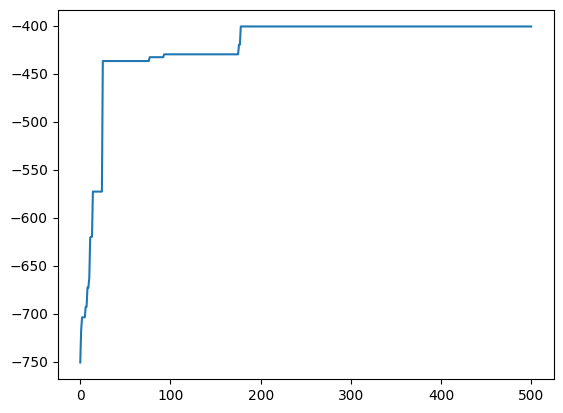

In [ ]:
# Plot for each generation the best fitness
best_fitness = [best_individuals[i].fitness for i in range(len(best_individuals))]
plt.plot(best_fitness)

In [ ]:
individuals[3].generation

500

YOU WON! <3


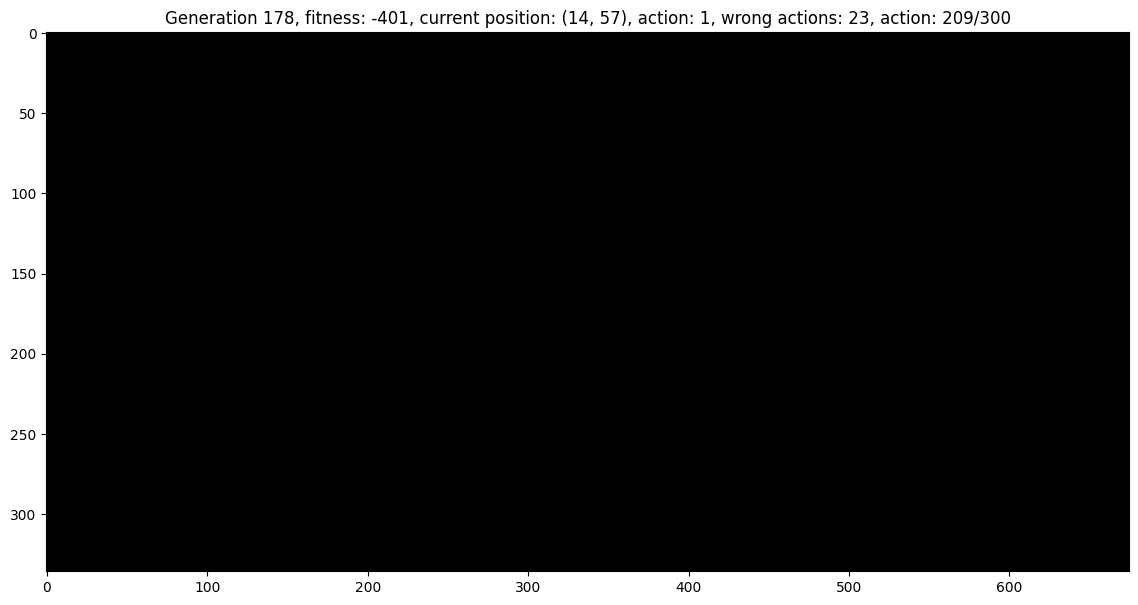

In [ ]:
env.reset()
plt.rcParams['figure.figsize'] = [17, 7]

image = plt.imshow(game[:, 300:975])
# for generation, path in enumerate(best_paths):
# plt.title(f"Generation {generation}, fitness: {best_scores[generation]:.2f}, last move: {path[-1]}")
#start = best_paths[0]
#path = best_paths[-1]
actions = []
actions = individuals[0].actions
wrong = 0

for i, action in enumerate(actions):
    try: 
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.title(f"Generation {individuals[0].generation}, fitness: {individuals[0].fitness}, current position: {individuals[0].path[i]}, action: {action}, wrong actions: {wrong}, action: {i+1}/{len(actions)}")
        image.set_data(s['pixel'][:, 300:975])
        #time.sleep(0.1)
        if individuals[0].path[i] == map.target:
            print('YOU WON! <3')
            break
        if individuals[0].path[i] == individuals[0].path[i-1]:
            wrong += 1
    except RuntimeError:
        print('YOU WON! <3')

In [ ]:
target

(14, 57)

In [ ]:
"""MAX_GENERATIONS = 1000
MAX_INDIVIDUALS = 100

best_scores =[]
best_paths = []
zero_fitness = []

# create a list of individuals, starting with random moves (illegal actions filtered out)
print("> Creating initial population...")
individuals = [random_nsteps(game_map, start, target) for _ in range(MAX_INDIVIDUALS)]
best_fitness = np.inf

print("> Evolving...")
for generation in tqdm(range(MAX_GENERATIONS)):
    
    generation_scores = []

    #fitnesses = [fitness_function(individual, checkpoints, generation) for individual in individuals]
    #fitness_function = lambda path: abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1])

    ind_actions = [actions_from_path(start, ind) for ind in individuals]
    generation_scores.append(min(fitnesses))

    # this is a list of tuples (individual, fitness). individual is a list of moves
    population = list(zip(individuals, fitnesses))
    actions =  list(zip(ind_actions, fitnesses))

    # sorting the population by best fitness (lower is better)
    population.sort(key=lambda x: x[1])
    actions.sort(key=lambda x:x[1])
    # sort ind_actions with respect to population
    
    #print(f"best score: {population[0][1]:.2f}")

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.

    child1, child2, = actions[0][0], actions[1][0]

    offspring = [crossover(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child) for child in offspring]
    ind_actions = offspring
    individuals = [path_from_actions(game_map, start, child) for child in offspring]

    best_fitness = population[0][1]
    best_scores.append(population[0][1])    
    best_paths.append(population[0][0])
    #print(f"Generation {generation}: best score {best_fitness:.2f}")

    if best_fitness == 0:
        zero_fitness.append(population[0][0])
    
# print best score and best path
best_idx = np.argmin(best_scores)
print(f"Best score: {best_scores[best_idx]:.2f}")
print(f"Best path: {best_paths[best_idx]}")
print(f"generation of best path: {best_idx}")"""

'MAX_GENERATIONS = 1000\nMAX_INDIVIDUALS = 100\n\nbest_scores =[]\nbest_paths = []\nzero_fitness = []\n\n# create a list of individuals, starting with random moves (illegal actions filtered out)\nprint("> Creating initial population...")\nindividuals = [random_nsteps(game_map, start, target) for _ in range(MAX_INDIVIDUALS)]\nbest_fitness = np.inf\n\nprint("> Evolving...")\nfor generation in tqdm(range(MAX_GENERATIONS)):\n    \n    generation_scores = []\n\n    #fitnesses = [fitness_function(individual, checkpoints, generation) for individual in individuals]\n    #fitness_function = lambda path: abs(path[-1][0] - target[0]) + abs(path[-1][1] - target[1])\n\n    ind_actions = [actions_from_path(start, ind) for ind in individuals]\n    generation_scores.append(min(fitnesses))\n\n    # this is a list of tuples (individual, fitness). individual is a list of moves\n    population = list(zip(individuals, fitnesses))\n    actions =  list(zip(ind_actions, fitnesses))\n\n    # sorting the popula